In [1]:
import numpy as np

from scipy.stats import norm
import warnings 
warnings.filterwarnings('ignore')
from tqdm import tqdm

import time
from scipy.ndimage.interpolation import shift
import scipy.stats
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
from delta_hedging import delta_hedging

import matplotlib.pyplot as plt
import pandas as pd

### 현재가 50,000원 $K$ = 55,000원  수량# 100,000 계약
### OPT 매도 포지션일때 내재 변동성 45%로 마진을 쌓아 놓고 Hedging PNL을 계산한다
### Int cost=4% daily calculation
### Transaction Cost= 0.1% at selling

In [325]:
inputs = {
    's0' : 50000,
    'k' : 55000,
    'rf' : 0.04,
    'sigma' : 0.46,
    'imvol' : 0.46,
    'T' : 1,
    'mu' : 0.04,
    'q' : 0,
    'interval' : 1/360,
    'time_step' : 180,
    'simul_num' : 1000,
    'num_shares' : 100000
}
dh = delta_hedging(inputs)

In [192]:
dh.bs_call('c')

4934.297619008677

In [342]:
dh.path_delta()[-1, :]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

In [194]:
path = dh.stock_path()

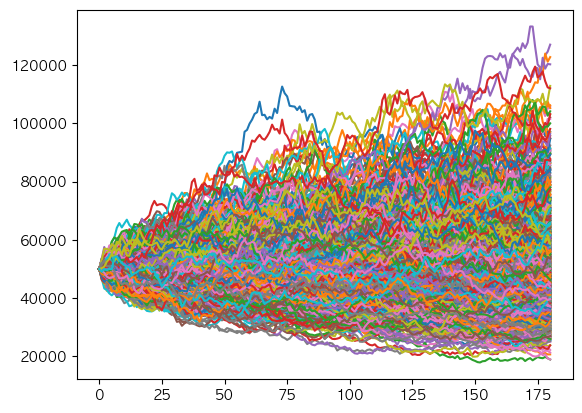

In [195]:
plt.plot(path)
plt.show()

In [15]:
dh.k

55000

In [16]:
path[:]

array([[50000.        , 50000.        , 50000.        , ...,
        50000.        , 50000.        , 50000.        ],
       [48824.52562437, 51607.80245076, 49221.43353001, ...,
        49675.35064902, 49363.14618561, 49193.47013599],
       [48165.9604853 , 51834.51818126, 50044.45584886, ...,
        50409.88028699, 48069.55342707, 50707.07158866],
       ...,
       [74702.0912521 , 44767.98790766, 52059.60516436, ...,
        46630.38329413, 48952.16802803, 41671.18946501],
       [73361.50608945, 44697.86134172, 53832.04073324, ...,
        46710.72054043, 47964.0143167 , 39641.02557096],
       [70800.56280523, 43781.33778296, 51230.34317087, ...,
        45770.74486569, 45911.28919096, 40085.49057629]])

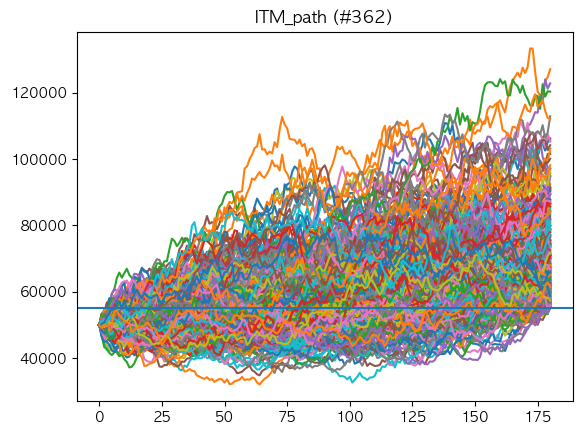

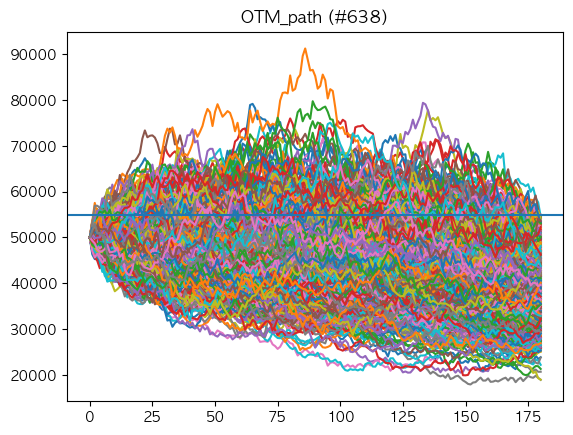

In [196]:
'''OTM, ITM, ATM Path 나누기 '''
itm_path = path[:, np.where(path[-1,:] > dh.k)[0]]
atm_path = path[:, np.where(path[-1,:] == dh.k)[0]]
otm_path = path[:, np.where(path[-1,:] < dh.k)[0]]


plt.title(f'ITM_path (#{itm_path.shape[1]})')
plt.plot(itm_path)
plt.axhline(dh.k)
plt.show()

if atm_path.size != 0:
    plt.plot(atm_path)
    plt.axhline(dh.k)
    plt.show()
else:
    pass

plt.title(f'OTM_path (#{otm_path.shape[1]})')
plt.plot(otm_path)
plt.axhline(dh.k)
plt.show()

In [34]:
'''항상 ITM 이거나, OTM인 주가를 분석하는게 의미가 있을까? 생각해보기'''
# itm_path_always_over  = itm_path[:,np.where(itm_path.argmin(axis=0) == 0)[0]]
# otm_path_always_under = otm_path[:,np.where(otm_path.argmax(axis=0) == 0)[0]]

# plt.title(f'ITM_path_always (#{itm_path_always_over.shape[1]})')
# plt.plot(itm_path_always_over)
# plt.axhline(dh.k)
# plt.show()


'항상 ITM 이거나, OTM인 주가를 분석하는게 의미가 있을까? 생각해보기'

# PreTerm 보기

In [197]:
from delta_hedging import delta_hedging

inputs = {
    's0' : 50000,
    'k' : 55000,
    'rf' : 0.04,
    'sigma' : 0.46,
    'imvol' : 0.46,
    'T' : 1,
    'mu' : 0.04,
    'q' : 0,
    'interval' : 1/260,
    'time_step' : 130,
    'simul_num' : 1000,
    'num_shares' : 100000
}

dh = delta_hedging(inputs)
dh.hedging_cost().mean()

stock_path = dh.stock_path()
a = pd.DataFrame(data=stock_path[:,0], columns=['Stock Price'])
a = a.rename(columns={0:0})

delta_path = dh.path_delta(stock_path)
b = pd.DataFrame(data=delta_path[:,0], columns=['Delta'])
b = b.rename(columns={0:1})

path_delta_shares_ch = dh.path_changes(dh.path_delta_shares(stock_path))
c = pd.DataFrame(data=path_delta_shares_ch[:,0], columns=['# Purchase_ch'])
c = c.rename(columns={0:2})

'''divided by 1000'''
path_delta_shares_cost_ch = dh.path_changes(dh.path_delta_shares_cost(stock_path, tr=0.0015)) / 1000
d = pd.DataFrame(data=path_delta_shares_cost_ch[:,0], columns=['Purchased Cost / 1000'])
d = d.rename(columns={0:3})

path_delta_hedged_cum = dh.path_delta_hedged_cum(stock_path, tr=0.001)/1000
e = pd.DataFrame(data=path_delta_hedged_cum[:,0], columns=['Cum Cost / 1000'])
e = e.rename(columns={0:4})

delta_hedge_int_cost = dh.delta_hedging_int_cost(stock_path) / 1000
f = pd.DataFrame(data=delta_hedge_int_cost[:,0], columns=['int Cost / 1000'])
f = f.rename(columns={0:5})

tmp = pd.concat([a, b, c, d, e, f], axis=1)
np.round(tmp,3)

,Stock Price,Delta,# Purchase_ch,Purchased Cost / 1000,Cum Cost / 1000,int Cost / 1000
0,50000.000,0.473,47253.566,2366222.341,2365041.001,363.489
1,48291.849,0.429,-4324.250,-289976.549,2077028.486,319.224
2,49177.618,0.451,2124.891,142736.290,2221291.229,341.396
3,47958.654,0.419,-3159.795,-206768.641,2016334.503,309.895
4,48261.310,0.426,668.566,45012.862,2062875.919,317.048
...,...,...,...,...,...,...
126,73181.988,1.000,0.717,88162.236,7867316.606,1209.147
127,70603.093,1.000,0.005,-258275.871,7615221.462,1170.402
128,69202.058,1.000,0.018,-140312.415,7480836.961,1149.748
129,72788.242,1.000,0.001,359156.310,7845568.452,1205.805


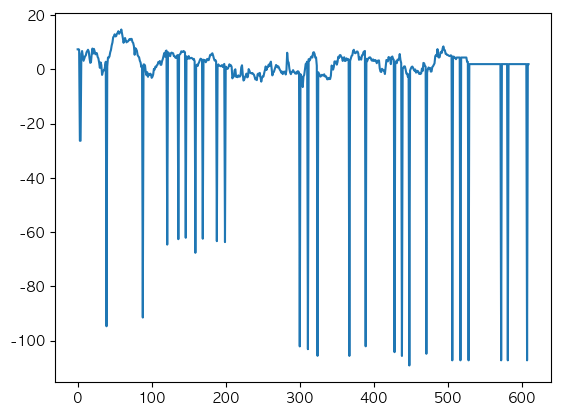

In [308]:
a = pd.read_csv('./Data/intra.csv')
plt.plot(a)

In [320]:
pd.DataFrame(np.where(a>0, a, np.nan)).dropna().mean()

0    3.973945
dtype: float64

In [198]:
ex1 = stock_path[:,0]

## 거래비용별 차이 보기

In [199]:
tr_high = 0
tr_low = 0
for x in tqdm(range(100)):
    stock_path = dh.stock_path()
    a = dh.path_delta_hedged_cum(stock_path)[-1,:].mean()
    b = dh.path_delta_hedged_cum(stock_path, tr=0.0015)[-1, :].mean()

    if a > b:
        tr_low += 1
    else:
        tr_high += 1

100%|██████████| 100/100 [00:57<00:00,  1.75it/s]


In [200]:
tr_high, tr_low

(100, 0)

# 거래비용 헷징 코스트 비교

In [11]:
dh.hedging_cost(stock_path, tr=0.0015).mean()

4358.853181096501

In [12]:
dh.hedging_cost(stock_path).mean()

4195.674825022851

# ex1

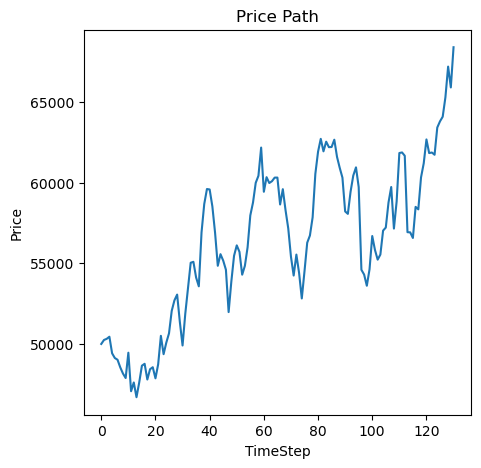

In [37]:
plt.figure(figsize=(5,5), facecolor='w')
plt.plot(stock_path[:,0])
plt.title('Price Path')
plt.xlabel('TimeStep')
plt.ylabel('Price')
plt.show()

In [291]:
import statsmodels.api as sm

sm.tsa.filters.hpfilter

<function statsmodels.tsa.filters.hp_filter.hpfilter(x, lamb=1600)>

In [301]:
filtered = sm.tsa.filters.hpfilter(dh.path_delta(stock_path)[:,0], 10)[1]
filtered.shape

(131,)

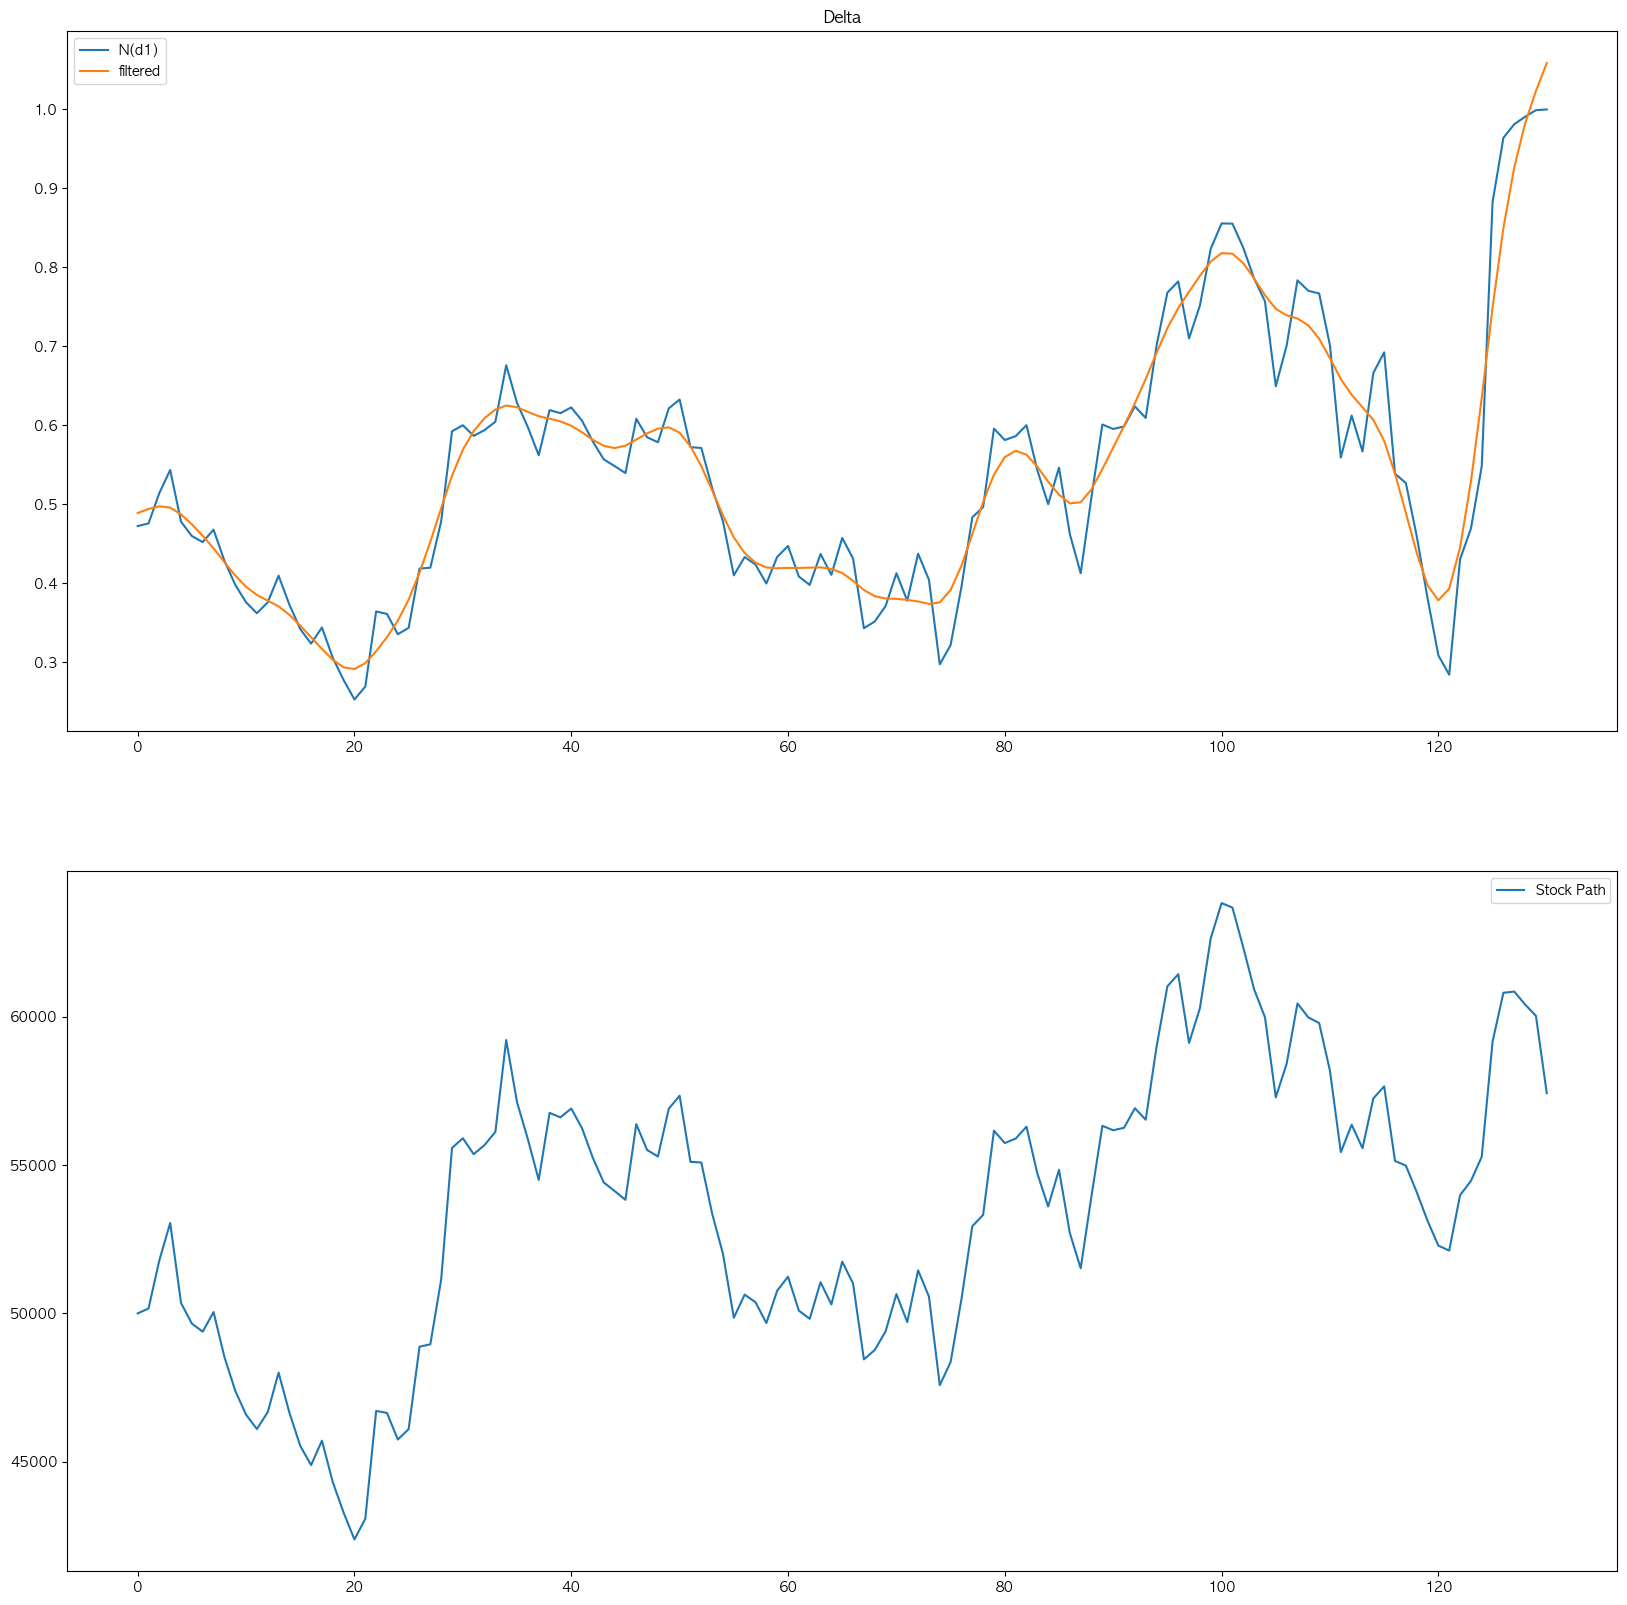

In [303]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.title('Delta')
plt.plot(dh.path_delta(stock_path)[:,0], label='N(d1)')
plt.plot(filtered, label='filtered')
plt.legend()

plt.subplot(2,1,2)
plt.plot(stock_path[:,0], label='Stock Path')
plt.legend()
plt.show()

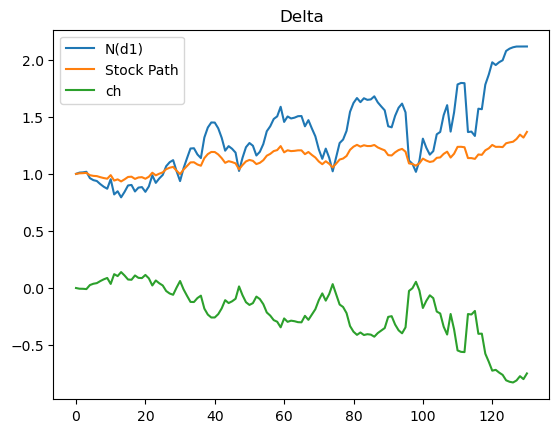

In [57]:
delta_path_scaled = dh.path_delta(stock_path)[:,0]/dh.path_delta(stock_path)[:,0][0]
stock_path_scaled = stock_path[:,0]/stock_path[:,0][0]

stock_path_scaled - delta_path_scaled 

plt.figure()
plt.title('Delta')
plt.plot(dh.path_delta(stock_path)[:,0]/dh.path_delta(stock_path)[:,0][0], label='N(d1)')
plt.plot(stock_path[:,0]/stock_path[:,0][0], label='Stock Path')
plt.plot(stock_path_scaled - delta_path_scaled, label='ch')
plt.legend()
plt.show()


In [55]:
delta_path_scaled = dh.path_delta(stock_path)[:,0]/dh.path_delta(stock_path)[:,0][0]
stock_path_scaled = stock_path[:,0]/stock_path[:,0][0]

stock_path_scaled - delta_path_scaled 

array([ 0.        , -0.00618119, -0.00679364, -0.00932278,  0.02580019,
        0.0373652 ,  0.04290038,  0.06077502,  0.07611484,  0.088032  ,
        0.03591759,  0.12141363,  0.10455437,  0.13954984,  0.1095379 ,
        0.07438092,  0.072423  ,  0.10995337,  0.08909379,  0.08688734,
        0.11459329,  0.08471019,  0.02227966,  0.06614184,  0.04168181,
        0.02237085, -0.02641248, -0.04804521, -0.05923861,  0.00406745,
        0.06132193, -0.01149953, -0.06802336, -0.12163604, -0.12281426,
       -0.08809623, -0.06710548, -0.18044595, -0.23272021, -0.25837996,
       -0.2580988 , -0.22907681, -0.17836059, -0.10637234, -0.13178547,
       -0.11644595, -0.09417335,  0.01393657, -0.06301221, -0.12450552,
       -0.14815909, -0.13241353, -0.07522829, -0.09668357, -0.14166823,
       -0.21430686, -0.24190757, -0.28136495, -0.29539923, -0.34443321,
       -0.26658427, -0.29628206, -0.2860753 , -0.29088003, -0.2992209 ,
       -0.30056167, -0.24381888, -0.2790088 , -0.23176985, -0.18

# 실 옵션 데이터 

In [59]:
import os

def ch (name):
    cptype = name[7:8]
    maturity = name[9:15]
    strike = name[16:]

    return cptype+maturity+strike

def op_chain_df (file, cpflag, maturity, strike):
    '''file is original csv 코드랑 같은 위치에 Data 폴더 안에 넣을 것, cpflag is str, maturity is str, strike is int'''
    
    file_path = os.getcwd() + '/Data/'

    name = cpflag + str(maturity) + str(strike)

    df = pd.read_csv(file_path + file)[8:]
    df = df.set_axis(df.iloc[0], axis=1).drop(index=[8, 9, 10, 11, 12, 13])

    df = df.rename(columns={df.columns[0]:'Date'}).set_index('Date')
    
    df.index = pd.to_datetime(df.index)
    df.columns = [ch(x) for x in df.columns]

    tmp = df[name]
    tmp.columns = ['종가','기준가','기초자산가','거래량','행사가격','내재변동성','잔존일수']

    return tmp

def op_list (file):
    
    file_path = os.getcwd() + '/Data/'

    df = pd.read_csv(file_path + file)[8:]
    df = df.set_axis(df.iloc[0], axis=1).drop(index=[8, 9, 10, 11, 12, 13])

    df = df.rename(columns={df.columns[0]:'Date'}).set_index('Date')

    df.index = pd.to_datetime(df.index)
    df.columns = [ch(x) for x in df.columns]

    return list(df.columns.unique())

In [268]:
from pykrx import stock

k_list = [float(x[-5:]) for x in op_list('opt_8.csv')]
options = op_list('opt_8.csv')
index_price = stock.get_index_ohlcv('20180101', '20211231', '1028')['종가']

In [70]:
options

['C202208310.0',
 'C202208312.5',
 'C202208315.0',
 'C202208317.5',
 'C202208320.0',
 'C202208322.5',
 'C202208325.0',
 'C202208327.5',
 'C202208330.0',
 'C202208332.5',
 'C202208335.0',
 'P202208307.5',
 'P202208305.0',
 'P202208302.5',
 'P202208300.0',
 'P202208297.5',
 'P202208295.0',
 'P202208292.5',
 'P202208290.0',
 'P202208287.5',
 'P202208285.0',
 'P202208282.5']

In [73]:
df = op_chain_df('opt_8.csv', 'C', 202208, 310.0)
df.index

DatetimeIndex(['2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09',
               ...
               '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23',
               '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
               '2022-11-28', '2022-11-29'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [272]:
index_price.min() * 0.95, index_price.max() * 1.05

(189.316, 462.42)

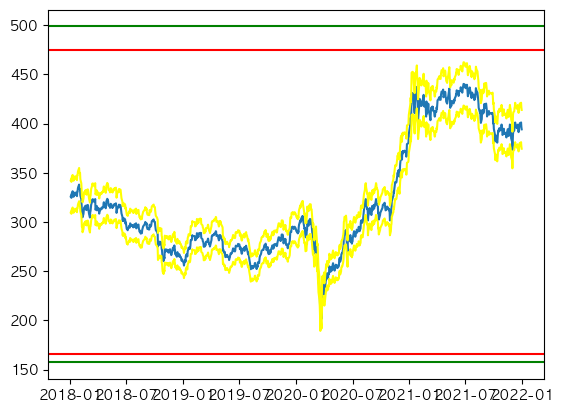

In [322]:
plt.plot(index_price)
plt.plot(index_price * 1.05, color='yellow')
plt.plot(index_price * 0.95, color='yellow')
plt.axhline(475.0, color='r')
plt.axhline(165.5, color='r')
plt.axhline(165.5 * 0.95, color='g')
plt.axhline(475.0 * 1.05, color='g')


## 2022년 7월~ 2022년 9월까지

In [243]:
df = pd.read_csv('./Data/Opt_8.csv')[8:]
df = df.set_axis(df.iloc[0], axis=1).drop(index=[8, 9, 10, 11, 12, 13])

df = df.rename(columns={df.columns[0]:'Date'}).set_index('Date')

df.index = pd.to_datetime(df.index)
df.columns = [ch(x) for x in df.columns]

In [244]:
spot_list = index_price.loc['2022-07':'2022-08-10']
op_chain = df.loc['2022-07':'2022-08-10']

In [245]:
op_chain.head()

,C202208310.0,C202208310.0,C202208310.0,C202208310.0,C202208310.0,C202208310.0,C202208310.0,C202208312.5,C202208312.5,C202208312.5,...,P202208285.0,P202208285.0,P202208285.0,P202208282.5,P202208282.5,P202208282.5,P202208282.5,P202208282.5,P202208282.5,P202208282.5
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-01,6.44,7.89,304.02,264,310.00,0.211,42,5.38,6.67,304.02,...,285.00,0.261,42,2.83,2.44,304.02,"1,102",282.50,0.264,42
2022-07-02,6.44,7.89,304.02,264,310.00,0.211,42,5.38,6.67,304.02,...,285.00,0.261,42,2.83,2.44,304.02,"1,102",282.50,0.264,42
2022-07-03,6.44,7.89,304.02,264,310.00,0.211,42,5.38,6.67,304.02,...,285.00,0.261,42,2.83,2.44,304.02,"1,102",282.50,0.264,42
2022-07-04,6.08,6.44,304.01,328,310.00,0.213,39,4.92,5.38,304.01,...,285.00,0.255,39,2.63,2.83,304.01,694,282.50,0.26,39
2022-07-05,7.99,6.08,309.03,"1,257",310.00,0.21,38,6.72,4.92,309.03,...,285.00,0.254,38,1.64,2.63,309.03,"1,134",282.50,0.262,38


In [248]:
def atm_otm_find (spot, k, ratio):
    atm = k[np.argmin((k - spot)[(k - spot > 0)])]
    otm = k[np.argmin((k - spot * ratio)[(k - spot * ratio > 0)])]
    return atm, otm

In [249]:
spot = spot_list.to_numpy()

atm_list = []
otm_list = []

for x in spot:
    a, b = atm_otm_find(x, k_list, 0.95)
    atm_list.append(a)
    otm_list.append(b)

atm_list = np.array(atm_list)
otm_list = np.array(otm_list)

In [250]:
mapping = pd.DataFrame(index=spot_list.index)
mapping['atm'] = atm_list
mapping['otm'] = otm_list

In [273]:
iv_atm_list = []
iv_otm_list = []

for x in range(len(mapping)):

    atm   = mapping.iloc[x]['atm']
    otm   = mapping.iloc[x]['otm']

    atm_name = 'C202208' + str(atm)
    otm_name = 'P202208' + str(otm)
    
    try:
        iv_atm = float(op_chain[atm_name].iloc[x,5])
    except:
        iv_atm = np.nan
    try:
        iv_otm = float(op_chain[otm_name].iloc[x,5])
    except:
        iv_otm = np.nan

    iv_atm_list.append(iv_atm)
    iv_otm_list.append(iv_otm)
    
mapping['iv_atm'] = iv_atm_list
mapping['iv_otm'] = iv_otm_list
#mapping = mapping.fillna(method='ffill')
mapping['skew'] = mapping['iv_otm'] - mapping['iv_atm']

In [274]:
mapping

,atm,otm,iv_atm,iv_otm,skew
날짜,,,,,
2022-07-01,305.0,290.0,NaN,0.254,NaN
2022-07-04,305.0,290.0,NaN,0.254,NaN
2022-07-05,310.0,295.0,0.211,0.245,0.034
2022-07-06,302.5,287.5,NaN,0.250,NaN
2022-07-07,310.0,295.0,0.210,0.239,0.029
2022-07-08,310.0,295.0,0.205,0.234,0.029
2022-07-11,310.0,295.0,0.214,0.239,0.025
2022-07-12,307.5,290.0,NaN,0.250,NaN
2022-07-13,307.5,292.5,NaN,0.248,NaN


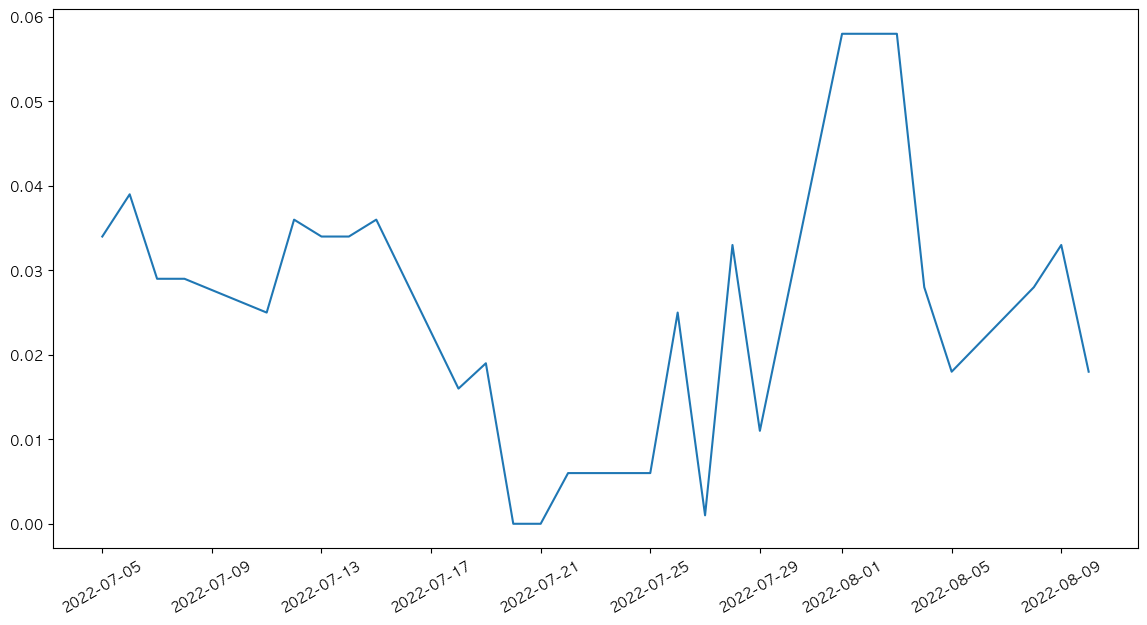

In [258]:
plt.figure(figsize=(14,7))
#plt.plot(mapping['iv_otm'])
#plt.plot(mapping['iv_atm'])
plt.plot(mapping['skew'])
plt.xticks(rotation=30)
plt.show()

['종가','기준가','기초자산가','거래량','행사가격','내재변동성','잔존일수']

In [185]:
name = 'C202208' + str(atm)
iv = float(op_chain[name].iloc[0,5])

0.211

,C202208310.0,C202208310.0,C202208310.0,C202208310.0,C202208310.0,C202208310.0,C202208310.0,C202208312.5,C202208312.5,C202208312.5,...,P202208285.0,P202208285.0,P202208285.0,P202208282.5,P202208282.5,P202208282.5,P202208282.5,P202208282.5,P202208282.5,P202208282.5
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30,NaN,NaN,NaN,NaN,310.00,NaN,NaN,NaN,NaN,NaN,...,285.00,NaN,NaN,NaN,NaN,NaN,NaN,282.50,NaN,NaN
2021-12-01,NaN,NaN,NaN,NaN,310.00,NaN,NaN,NaN,NaN,NaN,...,285.00,NaN,NaN,NaN,NaN,NaN,NaN,282.50,NaN,NaN
2021-12-02,NaN,NaN,NaN,NaN,310.00,NaN,NaN,NaN,NaN,NaN,...,285.00,NaN,NaN,NaN,NaN,NaN,NaN,282.50,NaN,NaN
2021-12-03,NaN,NaN,NaN,NaN,310.00,NaN,NaN,NaN,NaN,NaN,...,285.00,NaN,NaN,NaN,NaN,NaN,NaN,282.50,NaN,NaN
2021-12-04,NaN,NaN,NaN,NaN,310.00,NaN,NaN,NaN,NaN,NaN,...,285.00,NaN,NaN,NaN,NaN,NaN,NaN,282.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,18.85,14.30,329.92,63,310.00,0.32,1,16.40,11.50,329.92,...,285.00,0.634,1,0.01,0.01,329.92,1,282.50,0.664,1
2022-11-26,18.85,14.30,329.92,63,310.00,0.32,1,16.40,11.50,329.92,...,285.00,0.634,1,0.01,0.01,329.92,1,282.50,0.664,1
2022-11-27,18.85,14.30,329.92,63,310.00,0.32,1,16.40,11.50,329.92,...,285.00,0.634,1,0.01,0.01,329.92,1,282.50,0.664,1


In [277]:
stock.get_market_ticker_list('CO')

[]

In [305]:
spot_list.

날짜
2022-07-01    304.02
2022-07-04    304.01
2022-07-05    309.03
2022-07-06    302.28
2022-07-07    308.31
2022-07-08    310.15
2022-07-11    308.29
2022-07-12    305.03
2022-07-13    306.59
2022-07-14    305.35
2022-07-15    307.91
2022-07-18    314.87
2022-07-19    313.90
2022-07-20    316.02
2022-07-21    319.68
2022-07-22    317.33
2022-07-25    318.34
2022-07-26    319.61
2022-07-27    319.74
2022-07-28    321.62
2022-07-29    323.31
2022-08-01    322.97
2022-08-02    321.64
2022-08-03    323.80
2022-08-04    325.47
2022-08-05    327.50
2022-08-08    327.23
2022-08-09    328.11
2022-08-10    324.35
Name: 종가, dtype: float64